# <h1><center>Car Price Prediction</center></h1>

### 1. Load the library and data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
             #SK learn pkgs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

**Load the Data **

In [133]:
train = pd.read_csv("train.csv", encoding='latin-1')
test = pd.read_csv("test.csv",encoding='latin-1')
sample_soln = pd.read_csv("solution.csv",encoding='latin-1')

** EDA Analysis **

In [134]:
train.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17


In [135]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,60001,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000.0,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47
1,60002,21/03/16 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000.0,2,NaN,volkswagen,No,21/03/16 0:00,0,90762,23/03/16 2:50
2,60003,21/03/16 12:57,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,suv,2011,manual,190,navara,70000.0,3,diesel,nissan,No,21/03/16 0:00,0,4177,06/04/16 7:45
3,60004,23/03/16 15:48,Ford_C_MAX_2.0_TDCi_DPF_Titanium,private,offer,bus,2007,manual,136,c_max,150000.0,6,diesel,ford,No,23/03/16 0:00,0,88361,05/04/16 18:45
4,60005,18/03/16 21:44,BMW_530d_touring_Vollausstattung_NAVI,private,offer,Combi,2002,automatic,193,5er,150000.0,9,diesel,bmw,Yes,18/03/16 0:00,0,73765,18/03/16 21:44


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 20 columns):
x1     58857 non-null int64
x2     58857 non-null object
x3     58857 non-null object
x4     58857 non-null object
x5     58857 non-null object
y      58857 non-null int64
x6     57013 non-null object
x7     58857 non-null int64
x8     57138 non-null object
x9     58857 non-null int64
x10    58857 non-null object
x11    58857 non-null float64
x12    58857 non-null int64
x13    56772 non-null object
x14    58857 non-null object
x15    52008 non-null object
x16    58857 non-null object
x17    58857 non-null int64
x18    58857 non-null int64
x19    58857 non-null object
dtypes: float64(1), int64(7), object(12)
memory usage: 9.0+ MB


In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609 entries, 0 to 19608
Data columns (total 19 columns):
x1     19609 non-null int64
x2     19609 non-null object
x3     19609 non-null object
x4     19609 non-null object
x5     19609 non-null object
x6     18973 non-null object
x7     19609 non-null int64
x8     19104 non-null object
x9     19609 non-null int64
x10    19609 non-null object
x11    19609 non-null float64
x12    19609 non-null int64
x13    18855 non-null object
x14    19609 non-null object
x15    17360 non-null object
x16    19609 non-null object
x17    19609 non-null int64
x18    19609 non-null int64
x19    19609 non-null object
dtypes: float64(1), int64(6), object(12)
memory usage: 2.8+ MB


** Merge Test and Train Data **

In [138]:
train["source"] = 'train'
test["source"] = 'test'

In [139]:
dataset = pd.concat([train,test],axis=0)

**See How Many Missing Values We Have**

In [140]:
Missing_Data=dataset.isnull().sum()
Missing_Data

source        0
x1            0
x10           0
x11           0
x12           0
x13        2839
x14           0
x15        9098
x16           0
x17           0
x18           0
x19           0
x2            0
x3            0
x4            0
x5            0
x6         2480
x7            0
x8         2224
x9            0
y         19609
dtype: int64

In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78466 entries, 0 to 19608
Data columns (total 21 columns):
source    78466 non-null object
x1        78466 non-null int64
x10       78466 non-null object
x11       78466 non-null float64
x12       78466 non-null int64
x13       75627 non-null object
x14       78466 non-null object
x15       69368 non-null object
x16       78466 non-null object
x17       78466 non-null int64
x18       78466 non-null int64
x19       78466 non-null object
x2        78466 non-null object
x3        78466 non-null object
x4        78466 non-null object
x5        78466 non-null object
x6        75986 non-null object
x7        78466 non-null int64
x8        76242 non-null object
x9        78466 non-null int64
y         58857 non-null float64
dtypes: float64(2), int64(6), object(13)
memory usage: 13.2+ MB


In [142]:
col_category = dataset.select_dtypes(exclude=[np.number]).columns
col_category

Index(['source', 'x10', 'x13', 'x14', 'x15', 'x16', 'x19', 'x2', 'x3', 'x4',
       'x5', 'x6', 'x8'],
      dtype='object')

In [143]:
for col in col_category:
    print ([col]," : ",dataset[col].unique(),'\n')

['source']  :  ['train' 'test'] 

['x10']  :  ['Other' 'passat' 'c_klasse' '147' 'a4' '5_reihe' '6er' 'a3' 'range_rover'
 'e_klasse' 'astra' 'vito' '3er' 'fortwo' 'laguna' 'avensis' 'polo'
 'sharan' '3_reihe' 'a_klasse' 'viano' 'b_max' 'cayenne' '1er' 'clio' 'sl'
 'focus' 'touran' 'primera' '5er' '156' 'one' 'q3' 'agila' 'vectra'
 'tucson' 'a6' 'golf' 'rav' 'fiesta' 'a5' 'corsa' 'ptcruiser' 'touareg'
 'transporter' 'g_klasse' 'm_klasse' 'boxster' 'punto' '7er' 'yaris'
 'matiz' 'pajero' 'aygo' 'vivaro' 'slk' 'scirocco' 'megane' 'lupo' 'ibiza'
 'cooper' 'jetta' 'kangoo' 'a8' 'tigra' 'bora' 'cl' '2_reihe' 'corolla'
 'carnival' 'defender' 'panda' 'q5' 'clk' 'i_reihe' 'jazz' 'fox' 'duster'
 'c_max' 'fabia' '500' 'up' 'berlingo' 'caddy' 'scenic' 'meriva' 'jimny'
 'zafira' 'c1' 'glk' 'cc' 'cuore' 's_max' 'a1' 'leon' 'carisma' 'espace'
 'sprinter' 'mustang' 'twingo' 'rio' 'roomster' 'octavia' 'omega'
 'insignia' '6_reihe' 'v70' 'cr_reihe' 'colt' 'sportage' 'mondeo'
 'mx_reihe' 'clubman' 'trans

**Drop Unuseful COlumns - Most are unique**

In [144]:
drop_cols=["x2","x3","x10", "x16", "x19","x14","x4","x5"]

In [145]:
dataset=dataset.drop(drop_cols,axis=1)

**Assigning Dummies(Add blank) to NaN values as We Are Not Sure of Nulls**

In [146]:
dataset['x13'].fillna(value='blank', inplace=True)
dataset['x15'].fillna(value='blank', inplace=True)
dataset['x6'].fillna(value='blank', inplace=True)
dataset['x8'].fillna(value='blank', inplace=True)

** Recheck for Missing Data**

In [147]:
dataset.isnull().sum()

source        0
x1            0
x11           0
x12           0
x13           0
x15           0
x17           0
x18           0
x6            0
x7            0
x8            0
x9            0
y         19609
dtype: int64

In [148]:
dataset.head()

,source,x1,x11,x12,x13,x15,x17,x18,x6,x7,x8,x9,y
0,train,1,50000.0,7,petrol,No,0,34474,Small Car,2004,manual,94,3850.0
1,train,2,150000.0,5,diesel,No,0,50765,Combi,2007,manual,140,5999.0
2,train,3,150000.0,2,diesel,No,0,90475,limousine,2007,automatic,150,5990.0
3,train,4,150000.0,9,diesel,No,0,40699,limousine,2005,manual,150,4000.0
4,train,5,125000.0,3,petrol,No,0,84347,Combi,2005,manual,200,12950.0


In [149]:
col_category = dataset.select_dtypes(exclude=[np.number]).columns

In [150]:
for col in col_category:
    print ([col]," : ",dataset[col].unique(),'\n')

['source']  :  ['train' 'test'] 

['x13']  :  ['petrol' 'diesel' 'blank' 'lpg' 'cng' 'hybrid' 'electro' 'other'] 

['x15']  :  ['No' 'Yes' 'blank'] 

['x6']  :  ['Small Car' 'Combi' 'limousine' 'bus' 'coupe' 'suv' 'blank' 'cabrio'
 'Other'] 

['x8']  :  ['manual' 'automatic' 'blank'] 



**  Encoding Columns **

In [151]:
col_Integer = dataset.columns.difference(col_category)

In [152]:
dataset_OHE= pd.get_dummies(dataset[col_category])

In [153]:
final_df = pd.concat([dataset_OHE,dataset[col_Integer]],axis=1)

** Separate TrainModified and TestModified Data **

In [154]:
train_modified = final_df.loc[final_df.source_train==1.0,:]

In [155]:
test_modified = final_df.loc[final_df.source_train==0.0,:]

In [156]:
test_modified=test_modified.drop(['source_test', 'source_train','y'],axis=1)

In [157]:
train_modified=train_modified.drop(['source_test', 'source_train'],axis=1)

In [158]:
train_modified.head()

,x13_blank,x13_cng,x13_diesel,x13_electro,x13_hybrid,x13_lpg,x13_other,x13_petrol,x15_No,x15_Yes,...,x8_blank,x8_manual,x1,x11,x12,x17,x18,x7,x9,y
0,0,0,0,0,0,0,0,1,1,0,...,0,1,1,50000.0,7,0,34474,2004,94,3850.0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,2,150000.0,5,0,50765,2007,140,5999.0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,3,150000.0,2,0,90475,2007,150,5990.0
3,0,0,1,0,0,0,0,0,1,0,...,0,1,4,150000.0,9,0,40699,2005,150,4000.0
4,0,0,0,0,0,0,0,1,1,0,...,0,1,5,125000.0,3,0,84347,2005,200,12950.0


In [159]:
train_modified.to_csv("train_ready_for_model.csv",index=False)

In [160]:
test_modified.to_csv("test_ready_for_model.csv",index=False)

In [161]:
X = train_modified.drop(['x1','y'],axis = 1)
y = train_modified['y']

print(X.shape)
print(y.shape)

(58857, 29)
(58857,)


In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)

**Train the data into the model and calculate the performance**

In [163]:
MLA=[
LinearRegression(),
Lasso(),
Ridge(),
KNeighborsRegressor(),
DecisionTreeRegressor(),
RandomForestRegressor(),
AdaBoostRegressor(),
GradientBoostingRegressor(),
XGBRegressor(),
]

#Evaluate model error rate Using MAPE
MLA_columns = []
print("          ***MAPE is Used for Evaluation Metrics***              ")
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    
    predicted_train = alg.fit(X_train, y_train).predict(X_train)
    predicted_test = alg.fit(X_train, y_train).predict(X_test)
    #fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Error Data'] = np.mean(np.abs((y_train - predicted_train) / y_train)) * 100
    MLA_compare.loc[row_index, 'MLA Test Error Data'] = np.mean(np.abs((y_test - predicted_test) / y_test)) * 100
    #MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Error Data'], ascending = False, inplace = True)    
MLA_compare


          ***MAPE is Used for Evaluation Metrics***              


,MLA Name,MLA Train Error Data,MLA Test Error Data
6,AdaBoostRegressor,115.341457,117.836839
3,KNeighborsRegressor,55.089557,69.613952
0,LinearRegression,62.381049,63.110658
2,Ridge,62.377545,63.108415
1,Lasso,62.332364,63.069942
4,DecisionTreeRegressor,0.117796,37.249287
8,XGBRegressor,31.882810,32.493664
7,GradientBoostingRegressor,31.746297,32.419251
5,RandomForestRegressor,11.867071,31.090943


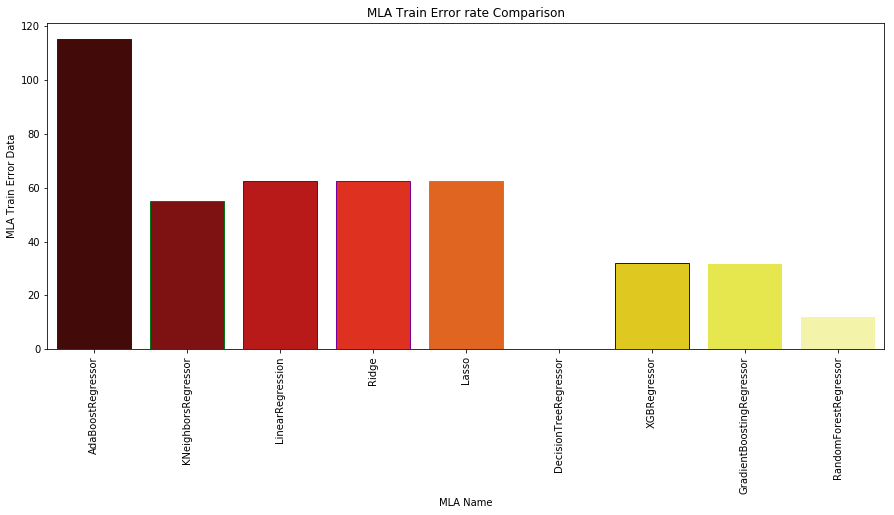

In [164]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Error Data",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Error rate Comparison')
plt.show()

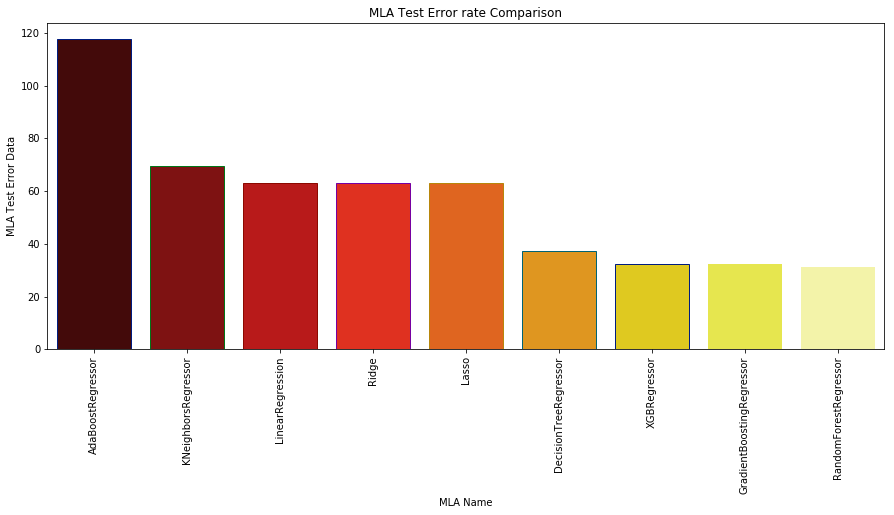

In [167]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Error Data",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Error rate Comparison')
plt.show()

In [168]:
RF = RandomForestRegressor(max_depth = 15, n_estimators = 100,random_state = 100)
RF.fit(X_train,y_train)
y_predict_rf = RF.predict(X_test)
MAPE = np.mean(np.abs((y_test - y_predict_rf) / y_valid)) * 100
print('Mean Absolute Percentage Error for Random Forest:',MAPE)

Mean Absolute Percentage Error for Random Forest: 29.89055482057224


In [169]:
test_modified.columns

Index(['x13_blank', 'x13_cng', 'x13_diesel', 'x13_electro', 'x13_hybrid',
       'x13_lpg', 'x13_other', 'x13_petrol', 'x15_No', 'x15_Yes', 'x15_blank',
       'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_blank', 'x6_bus',
       'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv', 'x8_automatic',
       'x8_blank', 'x8_manual', 'x1', 'x11', 'x12', 'x17', 'x18', 'x7', 'x9'],
      dtype='object')

In [170]:
train_modified.columns

Index(['x13_blank', 'x13_cng', 'x13_diesel', 'x13_electro', 'x13_hybrid',
       'x13_lpg', 'x13_other', 'x13_petrol', 'x15_No', 'x15_Yes', 'x15_blank',
       'x6_Combi', 'x6_Other', 'x6_Small Car', 'x6_blank', 'x6_bus',
       'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv', 'x8_automatic',
       'x8_blank', 'x8_manual', 'x1', 'x11', 'x12', 'x17', 'x18', 'x7', 'x9',
       'y'],
      dtype='object')

In [171]:
CarID= test_modified[['x1']]
OtherCols= test_modified.drop(['x1'],axis = 1)

In [184]:
RF = RandomForestRegressor(max_depth = 15, n_estimators = 100,random_state = 100)
RF.fit(X_train,y_train)
OtherCols['Y_Predict'] = RF.predict(OtherCols)

In [186]:
Predicted_results=pd.concat([CarID,OtherCols],axis=1)

In [190]:
Submission=Predicted_results.to_csv("RFR_Car_Price_results.csv")

In [192]:
Submission=pd.read_csv("RFR_Car_Price_results.csv")
Submission.head()

,Unnamed: 0,x1,x13_blank,x13_cng,x13_diesel,x13_electro,x13_hybrid,x13_lpg,x13_other,x13_petrol,...,x8_automatic,x8_blank,x8_manual,x11,x12,x17,x18,x7,x9,Y_Predict
0,0,60001,0,0,1,0,0,0,0,0,...,1,0,0,125000.0,8,0,90480,2004,163,6569.777743
1,1,60002,1,0,0,0,0,0,0,0,...,0,0,1,150000.0,2,0,90762,2004,131,3879.543086
2,2,60003,0,0,1,0,0,0,0,0,...,0,0,1,70000.0,3,0,4177,2011,190,19986.168663
3,3,60004,0,0,1,0,0,0,0,0,...,0,0,1,150000.0,6,0,88361,2007,136,6287.491979
4,4,60005,0,0,1,0,0,0,0,0,...,1,0,0,150000.0,9,0,73765,2002,193,2481.909574


<h1><center>** Final Model Car Prediction Results **</center></h1>

In [193]:
Submission.loc[:,['x1','Y_Predict']]

,x1,Y_Predict
0,60001,6569.777743
1,60002,3879.543086
2,60003,19986.168663
3,60004,6287.491979
4,60005,2481.909574
5,60006,11831.668564
6,60007,4682.430740
7,60008,7473.551053
8,60009,20080.605714
9,60010,8721.857531
